# IMAGE ENHANCEMENT

Muhammad Kanzoon MAR
19/442479/PA/19228

In [167]:
#import and function
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

def imshowGreal(img):
  plt.imshow(img, cmap='gray', vmin=0, vmax=255)
  plt.axis('off')

## Low Contrast Image (Contrast Stretching)

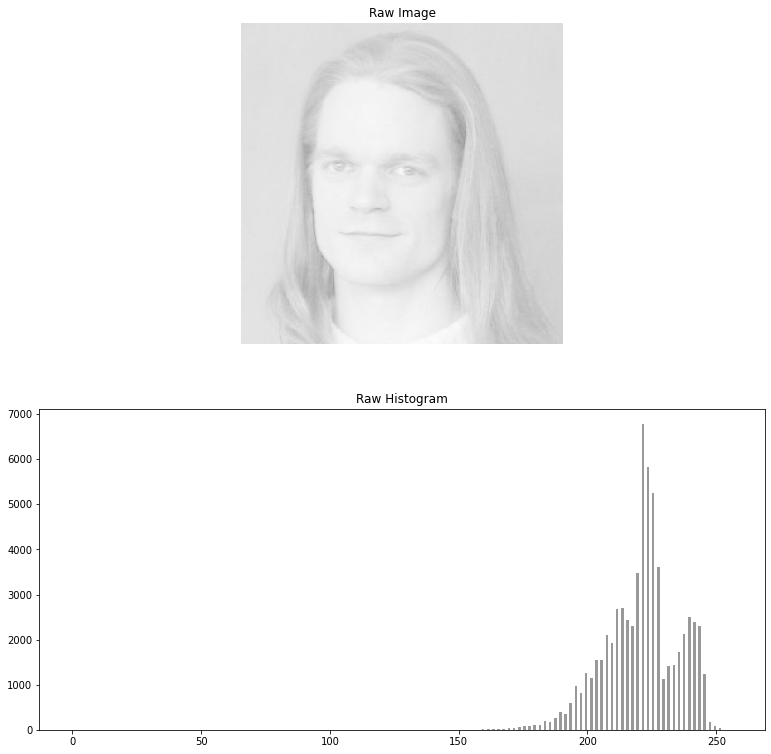

In [168]:
filepathlc = 'lowContrast.png'
imglc = cv.imread(filepathlc, cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(13,13))
plt.subplot(211)
plt.title('Raw Image')
imshowGreal(imglc)
plt.subplot(212)
plt.title('Raw Histogram')
plt.hist(imglc.ravel(), bins=256, range=(0, 256), color='black', alpha=0.4)
plt.show()

In [261]:
min=imglc.min()
max=imglc.max()
rows = imglc.shape[0]
cols = imglc.shape[1]

# Normal Contrast Stretching
def stretch(val,min,max,vmin,vmax):
    return int((val-min)*((vmax-vmin)/(max-min))+vmin)

# Piecewise Linear Contrast Stretching
def plstretch(arr,slice0,slice1):
    cut0 = int(np.percentile(arr, slice0))
    cut1 = int(np.percentile(arr, slice1))

    for i in range (rows):
        for j in range (cols):
            if (arr[i][j] < cut0):
                arr[i][j] = stretch(arr[i][j],min,cut0,0,(255*slice0/100))
            elif (arr[i][j] > cut1):
                arr[i][j] = stretch(arr[i][j],cut1,max,(255*slice1/100),255)
            else:
                arr[i][j] = stretch(arr[i][j],cut0,cut1,(255*slice0/100),(255*slice1/100))

imgs_n = imglc.copy()
for i in range (rows):
    for j in range (cols):
        imgs_n[i][j] = stretch(imgs_n[i][j], min, max, 0, 255)

imgs_pl_1090 = imglc.copy()
plstretch(imgs_pl_1090,10,90)
imgs_pl_2080 = imglc.copy()
plstretch(imgs_pl_2080,20,80)



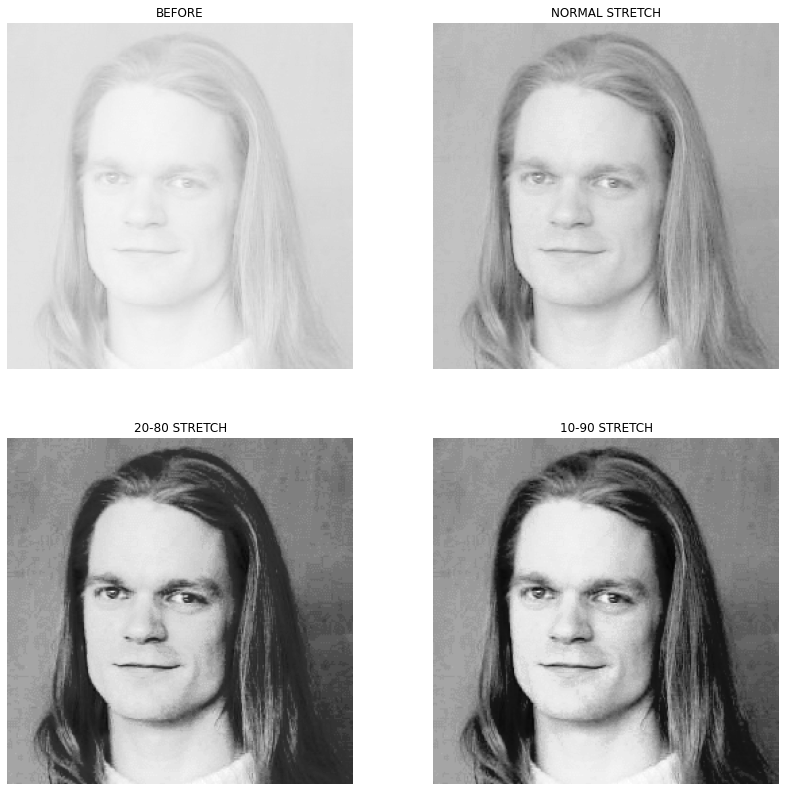

In [170]:
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.title('BEFORE')
imshowGreal(imglc)
plt.subplot(222)
plt.title('NORMAL STRETCH')
imshowGreal(imgs_n)
plt.subplot(223)
plt.title('20-80 STRETCH')
imshowGreal(imgs_pl_2080)
plt.subplot(224)
plt.title('10-90 STRETCH')
imshowGreal(imgs_pl_1090)

plt.show()

## Dark Image (Brighten)

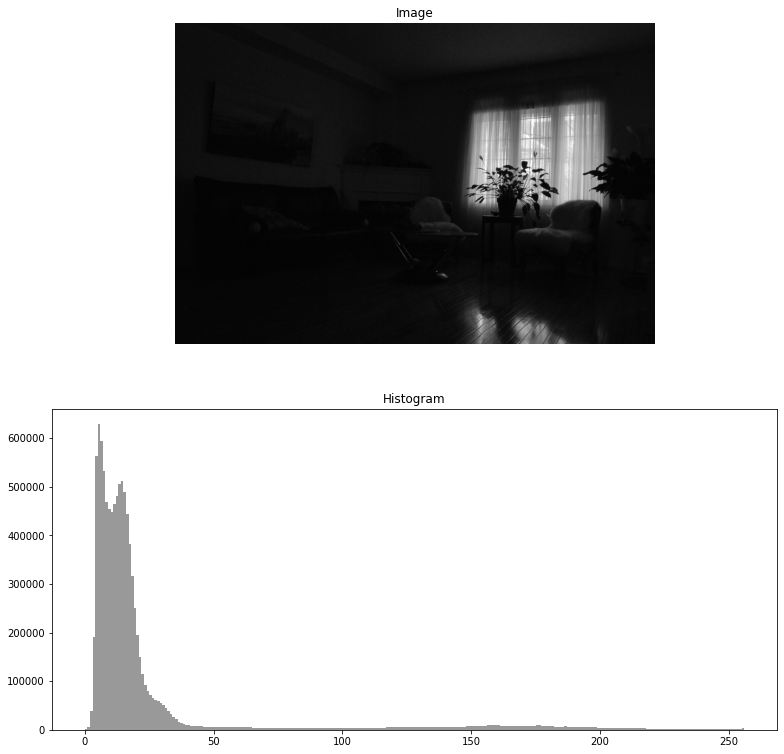

In [230]:
filepathd = 'dark.jpg'
imgd = cv.imread(filepathd, cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(13,13))
plt.subplot(211)
plt.title('Image')
imshowGreal(imgd)
plt.subplot(212)
plt.title('Histogram')
plt.hist(imgd.ravel(), bins=256, range=(0, 256), color='black', alpha=0.4)
plt.show()

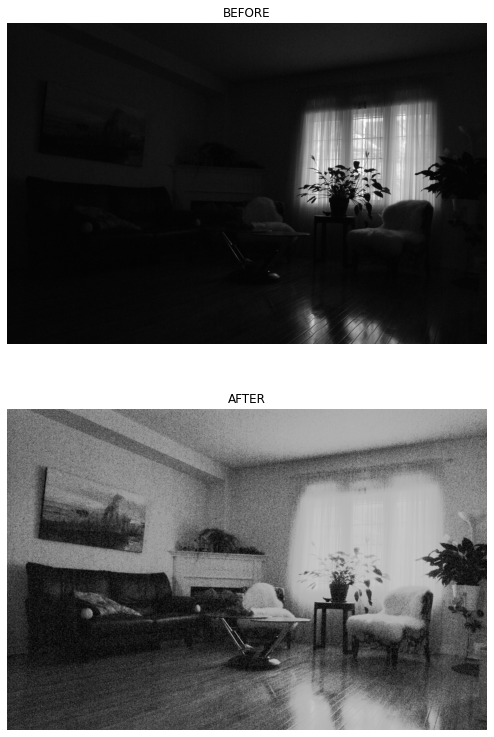

In [259]:
rows = imgd.shape[0]
cols = imgd.shape[1]

# Initialize table
newval=([])
for i in range(256):
    newval.append([])
    newval[-1].append(i)
    newval[-1].append(0)

# Get freq
for i in range (rows):
    for j in range (cols):
        n = imgd[i][j]
        newval[n][1] = newval[n][1] + 1

# Get New Value
for i in range(256):
    newval[i][1] = newval[i][1]/(rows*cols)
    if(i>0):
        newval[i][1] = newval[i][1]+newval[i-1][1]

for i in range(256):
    newval[i][1] = round((newval[i][1]*200),2)

imgb = imgd.copy()
for i in range (rows):
    for j in range (cols):
        n = imgb[i][j]
        imgb[i][j] = newval[n][1]

plt.figure(figsize=(13,13))
plt.subplot(211)
plt.title('BEFORE')
imshowGreal(imgd)
plt.subplot(212)
plt.title('AFTER')
imshowGreal(imgb)
plt.show()

## Bright Image (Darken)

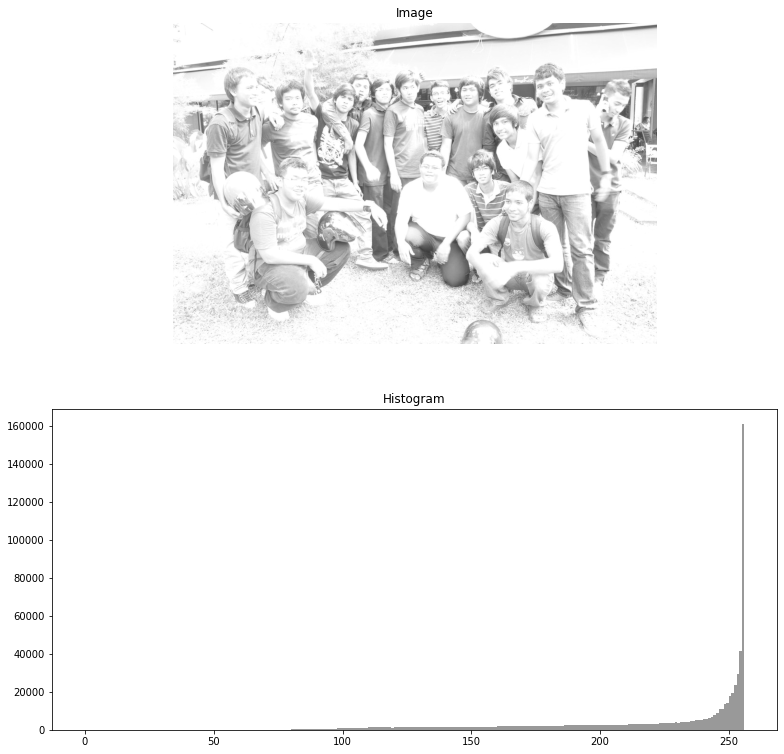

In [266]:
filepathbr = 'bright.jpg'
imgbr = cv.imread(filepathbr, cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(13,13))
plt.subplot(211)
plt.title('Image')
imshowGreal(imgbr)
plt.subplot(212)
plt.title('Histogram')
plt.hist(imgbr.ravel(), bins=256, range=(0, 256), color='black', alpha=0.4)
plt.show()

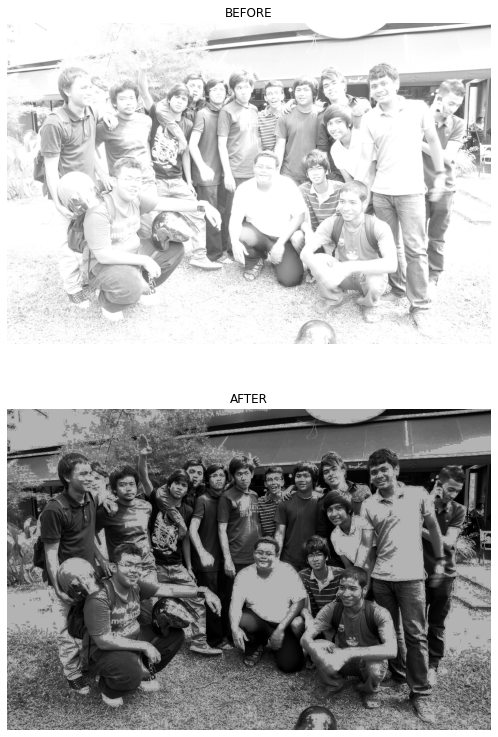

In [267]:
rows = imgbr.shape[0]
cols = imgbr.shape[1]

# minus = imgbr.min()
# for i in range (rows):
#     for j in range (cols):
#         imgbr[i][j] = imgbr[i][j]-minus

# Initialize table
newval=([])
for i in range(256):
    newval.append([])
    newval[-1].append(i)
    newval[-1].append(0)

# Get freq
for i in range (rows):
    for j in range (cols):
        n = imgbr[i][j]
        newval[n][1] = newval[n][1] + 1

# Get New Value
for i in range(256):
    newval[i][1] = newval[i][1]/(rows*cols)
    if(i>0):
        newval[i][1] = newval[i][1]+newval[i-1][1]

for i in range(256):
    newval[i][1] = round((newval[i][1]*180),2)

imgdr = imgbr.copy()
for i in range (rows):
    for j in range (cols):
        n = imgdr[i][j]
        imgdr[i][j] = newval[n][1]


plt.figure(figsize=(13,13))
plt.subplot(211)
plt.title('BEFORE')
imshowGreal(imgbr)
plt.subplot(212)
plt.title('AFTER')
imshowGreal(imgdr)
plt.show()